In [ ]:
!pip install diffusers transformers accelerate scipy safetensors --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.5 MB/s eta 0:00:00


In [ ]:
import torch
from diffusers import StableDiffusionInpaintPipeline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
shared_folder = "/content/drive/MyDrive/Stage2025/shared/mmpose"
frame_path = os.path.join(shared_folder, "random_frame.jpg")
mask_path = os.path.join(shared_folder, "mask.png")
output_path = os.path.join(shared_folder, "output.png")

In [ ]:
# Fonction pour afficher une image
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

Tentative 1

In [ ]:
# 1. Charger les images
frame = cv2.imread(frame_path)  # Image originale (BGR)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Mask original
mask_bin = (mask > 128).astype(np.uint8) * 255  # S'assurer que le mask est bien binaire

# 2. Générer le background modifié
frame_pil = Image.fromarray(frame_rgb)
mask_inverted_pil = Image.fromarray(255 - mask)

In [ ]:
# Inpainting
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16
).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` 

In [ ]:
# Prompt de génération
prompt = "the woman poledancing in a forest, high resolution"

In [ ]:
generated = pipe(
    prompt=prompt,
    image=frame_pil,
    mask_image=mask_inverted_pil,
).images[0]

generated_np = np.array(generated)

KeyboardInterrupt: 

In [ ]:
# 3. Poisson Blending (seamlessClone)
frame_bgr = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
generated_bgr = cv2.cvtColor(generated_np, cv2.COLOR_RGB2BGR)

# Vérifier que les dimensions correspondent
if frame_bgr.shape != generated_bgr.shape:
    print(f"Dimensions mismatch: frame {frame_bgr.shape}, generated {generated_bgr.shape}")
    # Redimensionner si nécessaire
    generated_bgr = cv2.resize(generated_bgr, (frame_bgr.shape[1], frame_bgr.shape[0]))

# Vérifier le masque
if mask_bin.shape[:2] != frame_bgr.shape[:2]:
    print(f"Mask dimensions mismatch: mask {mask_bin.shape}, frame {frame_bgr.shape[:2]}")
    mask_bin = cv2.resize(mask_bin, (frame_bgr.shape[1], frame_bgr.shape[0]))

# Calculer le centre avec précaution
ys, xs = np.where(mask_bin == 255)
if len(xs) > 0 and len(ys) > 0:
    # Calculer le barycentre
    center_x = int(np.mean(xs))
    center_y = int(np.mean(ys))

    # S'assurer que le centre est bien à l'intérieur des images
    h, w = generated_bgr.shape[:2]
    center_x = max(min(center_x, w-1), 0)
    center_y = max(min(center_y, h-1), 0)

    center = (center_x, center_y)

    try:
        # Tentative de clonage
        output = cv2.seamlessClone(
            frame_bgr,
            generated_bgr,
            mask_bin,
            center,
            cv2.MIXED_CLONE
        )
        print("Clonage réussi!")
    except cv2.error as e:
        print(f"Erreur lors du clonage: {e}")
        # Fallback: simplement fusionner les images avec le masque
        mask_3ch = cv2.merge([mask_bin/255, mask_bin/255, mask_bin/255])
        output = (frame_bgr * mask_3ch + generated_bgr * (1 - mask_3ch)).astype(np.uint8)
else:
    print("Masque vide ou invalide")
    output = generated_bgr  # Fallback

Dimensions mismatch: frame (1920, 1080, 3), generated (512, 512, 3)
Clonage réussi!


In [ ]:
# Sauvegarder le résultat
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
final_image_pil = Image.fromarray(output_rgb)
final_image_pil.save(output_path)

print(f"Generated image saved to: {output_path}")

Generated image saved to: /content/drive/MyDrive/Stage2025/shared/mmpose/output.png


Tentative 2

In [ ]:
# 3. Poisson Blending (seamlessClone)
# Remettre tout en BGR car OpenCV attend du BGR
frame_bgr = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
generated_bgr = cv2.cvtColor(generated_np, cv2.COLOR_RGB2BGR)

# Position approximative du barycentre du masque pour Poisson
ys, xs = np.where(mask_bin == 255)
center_x = (xs.min() + xs.max()) // 2
center_y = (ys.min() + ys.max()) // 2
center = (center_x, center_y)

In [ ]:
# Clone seamless
# Ensure images and mask have the same dimensions
generated_bgr = cv2.resize(generated_bgr, (frame_bgr.shape[1], frame_bgr.shape[0]))
mask_bin = cv2.resize(mask_bin, (frame_bgr.shape[1], frame_bgr.shape[0]))

output = cv2.seamlessClone(
    frame_bgr,        # source: l'original (le corps)
    generated_bgr,    # destination: background modifié
    mask_bin,         # masque: binaire (blanc = zone à insérer)
    center,           # centre approximatif du corps
    cv2.NORMAL_CLONE  # type de blending
)

# 4. Sauvegarder l'image finale
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
final_image_pil = Image.fromarray(output_rgb)
final_image_pil.save(output_path)

print(f"Generated image saved to: {output_path}")

Generated image saved to: /content/drive/MyDrive/Stage2025/shared/mmpose/output.png


Tentative 3

In [ ]:
# Load mask (assumed binary: 0 background, 255 body)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Inverser le mask
mask_inverted = cv2.bitwise_not(mask)

# Charger l'image nettoyée
background_clean = cv2.imread(frame_path)
background_clean_rgb = cv2.cvtColor(background_clean, cv2.COLOR_BGR2RGB)
background_clean_pil = Image.fromarray(background_clean_rgb)

# Convertir le mask inversé en PIL
mask_pil = Image.fromarray(mask_inverted)

In [ ]:
# Inpainting
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16
).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [ ]:
# Prompt de génération
prompt = "a vibrant forest background"

In [ ]:
# Générer le nouveau décor sur le background seulement
generated = pipe(
    prompt=prompt,
    image=background_clean_pil,
    mask_image=mask_pil,
).images[0]

# Sauvegarder le résultat
generated.save(output_path)
print(f"Generated image saved to: {output_path}")

  0%|          | 0/50 [00:00<?, ?it/s]

Generated image saved to: /content/drive/MyDrive/Stage2025/shared/mmpose/output.png


Tentative 4

In [ ]:
frame = Image.open(frame_path).convert("RGB")
mask = Image.open(mask_path).convert("L")

In [ ]:
# Chargement des images
frame = cv2.imread(frame_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# Le mask doit être binaire
_, mask_binary = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)

# Extraire uniquement le corps
body_only = cv2.bitwise_and(frame, frame, mask=mask_binary)

In [ ]:
# Inpainting pour supprimer le corps du background
background_clean = cv2.inpaint(frame, mask_binary, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Convertir pour Stable Diffusion
background_clean_pil = Image.fromarray(cv2.cvtColor(background_clean, cv2.COLOR_BGR2RGB))
mask_pil = Image.fromarray(mask_binary)


In [ ]:
# Inpainting
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16
).to(device)

In [ ]:
# Prompt de génération
prompt = "a vibrant forest background with glowing mushrooms"

# Génération avec le background nettoyé
generated = pipe(
    prompt=prompt,
    image=background_clean_pil,
    mask_image=mask_pil,
).images[0]

# Convertir en OpenCV
generated_cv = cv2.cvtColor(np.array(generated), cv2.COLOR_RGB2BGR)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# Définir le centre pour seamlessClone
center = (generated_cv.shape[1] // 2, generated_cv.shape[0] // 2)

# Assurez-vous que les images ont les mêmes dimensions
body_only = cv2.resize(body_only, (generated_cv.shape[1], generated_cv.shape[0]))
mask_binary = cv2.resize(mask_binary, (generated_cv.shape[1], generated_cv.shape[0]))

# Recoller le corps
final_image = cv2.seamlessClone(body_only, generated_cv, mask_binary, center, cv2.NORMAL_CLONE)

# Sauvegarder
cv2.imwrite(output_path, final_image)

print(f"Image finale enregistrée dans : {output_path}")

Image finale enregistrée dans : /content/drive/MyDrive/Stage2025/shared/mmpose/output.png


STOP

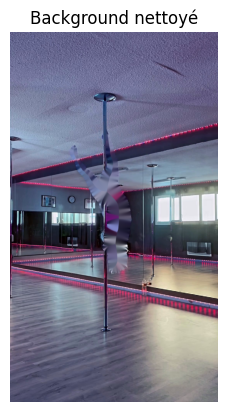

In [ ]:
def remove_object(image_pil, mask_pil):
    """Supprime le corps de l'image pour récupérer le background."""
    image = np.array(image_pil)
    mask = np.array(mask_pil)

    mask = (mask > 128).astype(np.uint8)  # Binariser le masque

    # Inpainting rapide pour boucher l'objet supprimé
    image_inpainted = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

    return Image.fromarray(image_inpainted)

# Nettoyage du background
background_clean = remove_object(frame, mask)

display_image(np.array(background_clean), "Background nettoyé")

AUTRES SPORTS

In [ ]:
shared_folder = "/content/drive/MyDrive/Stage2025/shared/mmpose"
frame_path = os.path.join(shared_folder,"foot", "random_framefoot.jpg")
mask_path = os.path.join(shared_folder,"foot", "maskfoot.png")
output_path = os.path.join(shared_folder,"foot", "outputfoot.png")

In [ ]:
shared_folder = "/content/drive/MyDrive/Stage2025/shared/mmpose"
frame_path = os.path.join(shared_folder,"ski", "random_frameski.jpg")
mask_path = os.path.join(shared_folder,"ski", "maskski.png")
output_path = os.path.join(shared_folder,"ski", "outputski.png")

In [ ]:
prompt = "the pole dancer in the jungle"

output = pipe(prompt=prompt, image=frame, mask_image=mask).images[0]
output.save(output_path)
print(f"Generated image saved to: {output_path}")

  0%|          | 0/50 [00:00<?, ?it/s]

Generated image saved to: /content/drive/MyDrive/Stage2025/shared/mmpose/output.png


In [ ]:
prompt = "the football player in the jungle"

output = pipe(prompt=prompt, image=frame, mask_image=mask).images[0]
output.save(output_path)
print(f"Generated image saved to: {output_path}")

  0%|          | 0/50 [00:00<?, ?it/s]

Generated image saved to: /content/drive/MyDrive/Stage2025/shared/mmpose/foot/outputfoot.png


In [ ]:
prompt = "the skier on a volcano"

output = pipe(prompt=prompt, image=frame, mask_image=mask).images[0]
output.save(output_path)
print(f"Generated image saved to: {output_path}")

  0%|          | 0/50 [00:00<?, ?it/s]

Generated image saved to: /content/drive/MyDrive/Stage2025/shared/mmpose/ski/outputski.png
